In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
import astropy.cosmology
import astropy.units as u
from chainconsumer import ChainConsumer
import pandas as pd
from scipy.stats import norm
from numpy.random import normal
from helper_functions import *
import astropy.table
import colorsys

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Times"]
})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
# %matplotlib inline
plt.rcParams.update({'font.size':12})

In [16]:
keys_to_use = ['all', '1t1', 'mtm', 'true_all']
# parnames = ['$\\Omega_m$', '$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$',]
parnames = ['\Omega_m', 'b_1', 'b_2', 'b_3', 'b_4', 'b_5',]
names = ['Observed All', 'One-to-One', 'Multiple-to-One', 'Truth', 'SkySim5000']

In [19]:
def load_in_chains(fileprefix, filesuffix):
    chain_list = []
    for key in keys_to_use:
        try:
            chain_list.append(np.load(fileprefix+key+filesuffix))
        except:
            print(f"error on key {key}")
            try:
                chain_list.append(np.load(fileprefix+key+'_Sep3.npy'))
            except:
                chain_list.append(np.load(fileprefix+key+'_Sep4.npy'))
    chain_list = np.array(chain_list)
    chain_trimmed = []
    for i in chain_list:
        chain_trimmed.append(process_stuck_chain(i, 100))
    chain_trimmed = np.array(chain_trimmed)
    
    return chain_trimmed

In [20]:
fiducial = load_in_chains('final_samples/chain_dc2_skysimjk_txpcut_', '_Mar1.npy')
Y1_pz = load_in_chains('final_samples/chain_dc2_skysimjk_txpcut_Y1photz_', '_Oct19.npy')
Y5 = load_in_chains('final_samples/chain_dc2_skysimjk_txpcut_Y5_', '_Aug6.npy')
Y5_pz = load_in_chains('final_samples/chain_dc2_skysimjk_txpcut_Y5photz_', '_Oct20.npy')

error on key true_all
error on key true_all


In [21]:
skysim = process_stuck_chain(np.load('final_samples/chain_skysim5000_skysimjk_txpcut_Aug3.npy'), 100)

In [22]:
chainlist = [fiducial, Y1_pz, Y5, Y5_pz, skysim]
chainnames = ['Y1', 'Y1+pz', 'Y5', 'Y5+pz', 'Skysim5000']

In [23]:
c = ChainConsumer()
colors = ['#5e59e5', '#61ccbf', '#cca64f', '#e5197b', '#72ad80']

for i in range(4): # Cycle through each subsample (all, 1-1, etc)
    for j in range(4): # Cycle through each of the different chains (Y1, Y5, etc)
        if (i==3) & ('pz' in chainnames[j]):
            pass
        else:
            c.add_chain(chainlist[j][i], parameters=parnames, name=chainnames[j], color=colors[i],)
            
# Add Skysim
c.add_chain(chainlist[4], parameters=parnames, name=chainnames[4], color=colors[4],)

In [24]:
summary_dict = c.analysis.get_summary()

In [25]:
print(names)
chainnames = ['Y1 $z_{true}$', 'Y1 $z_{phot}$', 'Y5 $z_{true}$', 'Y5 $z_{phot}$']
print(chainnames)
parnames = ['$\Omega_m$', '$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$',]
print(parnames)

['Observed All', 'One-to-One', 'Multiple-to-One', 'Truth', 'SkySim5000']
['Y1 $z_{true}$', 'Y1 $z_{phot}$', 'Y5 $z_{true}$', 'Y5 $z_{phot}$']
['$\\Omega_m$', '$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$']


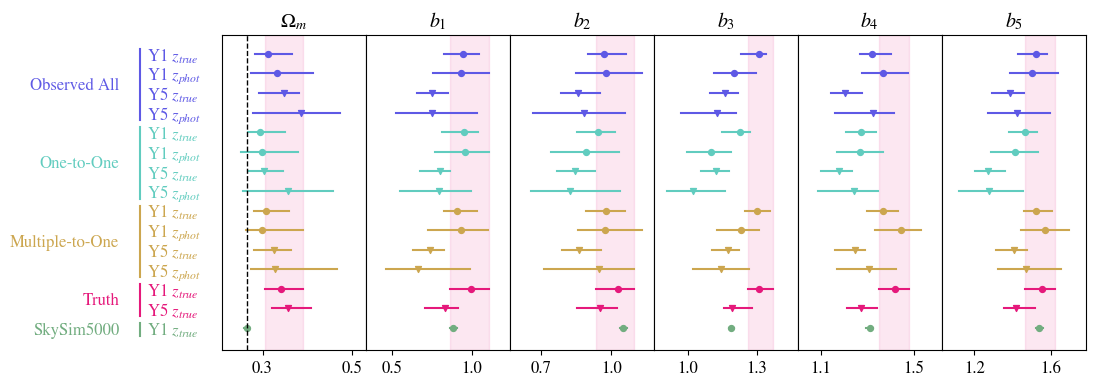

In [52]:
fig = plt.figure(figsize=(13,4.1))
gs = fig.add_gridspec(1, 7, hspace=0, wspace=0,)# width_ratios=[0.2,1,1,1,1,1,1]
axs = gs.subplots(sharex='col', sharey='row')

# limits = [(0.21,0.53), (0.24,1.24), (0.37,1.18), (0.58,1.48), (0.71,1.62), (0.76,1.73),]
# xticks = [(0.3, 0.5), 
#           (0.5, 1.0), 
#           (0.6, 0.9),
#           (0.8, 1.2),
#           (0.9, 1.4),
#           (1.0, 1.5)]

limits = [(0.21,0.53), (0.34,1.24), (0.57,1.18), (0.85,1.48), (1.0,1.62), (1.03,1.78),]
xticks = [(0.3, 0.5), 
          (0.5, 1.0), 
          (0.7, 1.0),
          (1.0, 1.3),
          (1.1, 1.5),
          (1.2, 1.6)]

for i in range(len(fig.get_axes())):
    if i==0:
        continue
    axs[i].set_title(parnames[i-1])
    axs[i].label_outer()
    axs[i].set_yticks([])
    axs[i].set_xlim(limits[i-1])
    num_this_color = 0
    color_idx = 0
    for j in range(len(summary_dict)):
        # Check how long we have been at the same color.
        num_this_color += 1
        if num_this_color > 4:
            # If more than 3, update the color
            num_this_color = 1
            color_idx += 1
        col = colors[color_idx]
        if j==14:
            col = colors[4]
        key = list(summary_dict[j].keys())[i-1]
        if j==12:
            # Add truth lines
            # axs[i].axvline(summary_dict[j][key][1], color=col, zorder=-100, lw=1, ls=':')
            axs[i].axvspan(summary_dict[j][key][0], summary_dict[j][key][2], color=col, zorder=-101, alpha=.1)
        
        # Add left hand labels
        if j==13:
            samplename = chainnames[2]
        elif j==14:
            samplename = chainnames[0]
        else:
            samplename = chainnames[j%4]         
        if i==1:
            axs[0].text(-0.5, -j, samplename, color=col, verticalalignment='center_baseline')
                
        if 'Y5' in samplename:
            marker='v'
        else:
            marker='o'
        axs[i].scatter(summary_dict[j][key][1], -j, color=col, marker=marker, s=18)
        axs[i].plot([summary_dict[j][key][0], summary_dict[j][key][2]], [-j,-j], color=col)
        
    axs[i].set_xticks(xticks[i-1])
axs[0].axis('off')
axs[0].set_xlim([-1,0.05])
barpos = -0.55
samplepos = -0.7

# Generate the colored bars
adj = -0.15
axs[0].plot([barpos,barpos], [0.25,-3.25+adj], color=colors[0])
axs[0].plot([barpos,barpos], [-3.75,-7.25+adj], color=colors[1])
axs[0].plot([barpos,barpos], [-7.75,-11.25+adj], color=colors[2])
axs[0].plot([barpos,barpos], [-11.75,-13.25+adj], color=colors[3])
axs[0].plot([barpos,barpos], [-13.75,-14.25+adj], color=colors[4])

# Generate the labels for the different blending samples
axs[0].text(samplepos, -1.5, names[0], color=colors[0], verticalalignment='center_baseline', horizontalalignment='right')
axs[0].text(samplepos, -5.5, names[1], color=colors[1], verticalalignment='center_baseline', horizontalalignment='right')
axs[0].text(samplepos, -9.5, names[2], color=colors[2], verticalalignment='center_baseline', horizontalalignment='right')
axs[0].text(samplepos, -12.5, names[3], color=colors[3], verticalalignment='center_baseline', horizontalalignment='right')
axs[0].text(samplepos, -14.0, names[4], color=colors[4], verticalalignment='center_baseline', horizontalalignment='right')

axs[1].axvline(0.265, color='black', ls='--', lw=1)
plt.savefig('compare_year_zphot.png', dpi=300, format='png', bbox_inches='tight')